In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import youtube_dl
import audioread
import librosa
import librosa.display
import matplotlib.pyplot as plt
from os import path
from pydub import AudioSegment
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
from pyACA.ToolComputeHann import ToolComputeHann
from pyACA.FeatureSpectralPitchChroma import FeatureSpectralPitchChroma
from pyACA.ToolPreprocAudio import ToolPreprocAudio
from pyACA.ToolReadAudio import ToolReadAudio
from spleeter.separator import Separator

In [3]:
audio_df = pd.read_csv("../ai_dj/data/audio_features.csv")

In [4]:
audio_df.head()

,Unnamed: 0,song_id,youtube_link,output_file,title,BPM,key,beat_frames,beat_times
0,0,no song_id,no youtube_link,5263861 Modestep - Bite The Hand (Original Mix...,5263861 Modestep - Bite The Hand (Original Mix),139.674831,G# Maj,[ 21 59 104 141 169 205 242 2...,[ 0.24380952 0.68498866 1.20743764 1.63...
1,0,no song_id,no youtube_link,5152629 Bob Moses - Far From the Tree (Origina...,5152629 Bob Moses - Far From the Tree (Origina...,109.956782,C Maj,[ 44 91 136 184 231 277 324 3...,[ 0.510839 1.05650794 1.57895692 2.13...
2,0,no song_id,no youtube_link,299800 Agnes (ch) - Bass Music For Bass People...,299800 Agnes (ch) - Bass Music For Bass People...,126.048018,C Maj,[ 18 59 100 141 181 222 263 3...,[ 0.20897959 0.68498866 1.16099773 1.63...
3,0,no song_id,no youtube_link,100066 Lindstrom - Monsteer (Original Mix).wav,100066 Lindstrom - Monsteer (Original Mix),114.843750,d min,[ 40 85 130 174 220 264 310 3...,[ 0.46439909 0.98684807 1.50929705 2.02...
4,0,no song_id,no youtube_link,1017875 JT Donaldson - UCFWM (Original Mix).wav,1017875 JT Donaldson - UCFWM (Original Mix),126.048018,c min,[ 23 64 105 145 186 227 267 3...,[ 0.26702948 0.74303855 1.21904762 1.68...


In [5]:
X = audio_df["key"]

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(audio_df[["key"]])
key_encoded = encoder.transform(audio_df[["key"]])

In [45]:
encoder.categories_

[array(['A Maj', 'A# Maj', 'B Maj', 'C Maj', 'C# Maj', 'D Maj', 'D# Maj',
        'E Maj', 'F Maj', 'F# Maj', 'G Maj', 'G# Maj', 'a min', 'a# min',
        'b min', 'c min', 'c# min', 'd min', 'd# min', 'e min', 'f min',
        'f# min', 'g min', 'g# min'], dtype=object)]

In [46]:
for index, key in enumerate(encoder.categories_[0]):
    audio_df[key] = key_encoded.T[index]

In [42]:
audio_df.head()

,Unnamed: 0,song_id,youtube_link,output_file,title,BPM,key,beat_frames,beat_times,A Maj,...,b min,c min,c# min,d min,d# min,e min,f min,f# min,g min,g# min
0,0,no song_id,no youtube_link,5263861 Modestep - Bite The Hand (Original Mix...,5263861 Modestep - Bite The Hand (Original Mix),139.674831,G# Maj,[ 21 59 104 141 169 205 242 2...,[ 0.24380952 0.68498866 1.20743764 1.63...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,no song_id,no youtube_link,5152629 Bob Moses - Far From the Tree (Origina...,5152629 Bob Moses - Far From the Tree (Origina...,109.956782,C Maj,[ 44 91 136 184 231 277 324 3...,[ 0.510839 1.05650794 1.57895692 2.13...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,no song_id,no youtube_link,299800 Agnes (ch) - Bass Music For Bass People...,299800 Agnes (ch) - Bass Music For Bass People...,126.048018,C Maj,[ 18 59 100 141 181 222 263 3...,[ 0.20897959 0.68498866 1.16099773 1.63...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,no song_id,no youtube_link,100066 Lindstrom - Monsteer (Original Mix).wav,100066 Lindstrom - Monsteer (Original Mix),114.843750,d min,[ 40 85 130 174 220 264 310 3...,[ 0.46439909 0.98684807 1.50929705 2.02...,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,no song_id,no youtube_link,1017875 JT Donaldson - UCFWM (Original Mix).wav,1017875 JT Donaldson - UCFWM (Original Mix),126.048018,c min,[ 23 64 105 145 186 227 267 3...,[ 0.26702948 0.74303855 1.21904762 1.68...,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 40.,  80., 114.,  90., 677., 288., 146.,  24.,  36.,   4.]),
 array([ 60.09265988,  73.96019678,  87.82773368, 101.69527057,
        115.56280747, 129.43034436, 143.29788126, 157.16541816,
        171.03295505, 184.90049195, 198.76802885]),
 <BarContainer object of 10 artists>)

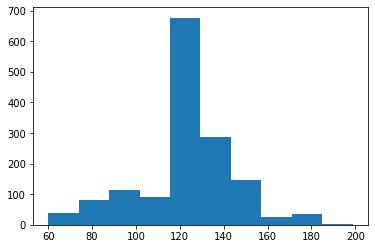

In [253]:
plt.hist(audio_df["BPM"])

In [252]:
audio_df["BPM"].mean()

124.97322267040484

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
audio_df["bpm_scaled"] = scaler.fit_transform(audio_df[["BPM"]])

In [50]:
audio_df

,Unnamed: 0,song_id,youtube_link,output_file,title,BPM,key,beat_frames,beat_times,A Maj,...,c min,c# min,d min,d# min,e min,f min,f# min,g min,g# min,bpm_scaled
0,0,no song_id,no youtube_link,5263861 Modestep - Bite The Hand (Original Mix...,5263861 Modestep - Bite The Hand (Original Mix),139.674831,G# Maj,[ 21 59 104 141 169 205 242 2...,[ 0.24380952 0.68498866 1.20743764 1.63...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700378
1,0,no song_id,no youtube_link,5152629 Bob Moses - Far From the Tree (Origina...,5152629 Bob Moses - Far From the Tree (Origina...,109.956782,C Maj,[ 44 91 136 184 231 277 324 3...,[ 0.510839 1.05650794 1.57895692 2.13...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.715377
2,0,no song_id,no youtube_link,299800 Agnes (ch) - Bass Music For Bass People...,299800 Agnes (ch) - Bass Music For Bass People...,126.048018,C Maj,[ 18 59 100 141 181 222 263 3...,[ 0.20897959 0.68498866 1.16099773 1.63...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051203
3,0,no song_id,no youtube_link,100066 Lindstrom - Monsteer (Original Mix).wav,100066 Lindstrom - Monsteer (Original Mix),114.843750,d min,[ 40 85 130 174 220 264 310 3...,[ 0.46439909 0.98684807 1.50929705 2.02...,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.482564
4,0,no song_id,no youtube_link,1017875 JT Donaldson - UCFWM (Original Mix).wav,1017875 JT Donaldson - UCFWM (Original Mix),126.048018,c min,[ 23 64 105 145 186 227 267 3...,[ 0.26702948 0.74303855 1.21904762 1.68...,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,A1eiTbiSrRc,https://www.youtube.com/watch?v=A1eiTbiSrRc,OK - Cool - Aight feat. Conquer Jones-A1eiTbiS...,OK - Cool - Aight feat. Conquer Jones,126.048018,e min,[ 4 45 86 128 169 210 252 2...,[4.64399093e-02 5.22448980e-01 9.98458050e-01 ...,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.051203
1495,0,SKUk9RUacDQ,https://www.youtube.com/watch?v=SKUk9RUacDQ,64 Ways (Dam Swindle's 65th Way Dub) feat. May...,64 Ways (Dam Swindle's 65th Way Dub) feat. May...,123.046875,G# Maj,[ 9 52 94 136 178 220 262 3...,[1.04489796e-01 6.03718821e-01 1.09133787e+00 ...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.091770
1496,0,nXOSgekiAJc,https://www.youtube.com/watch?v=nXOSgekiAJc,Disclosure - Expressing What Matters (Visualis...,Disclosure - Expressing What Matters (Visualiser),120.185320,b min,[ 79 123 165 210 253 296 339 3...,[ 0.91718821 1.42802721 1.91564626 2.43...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228094
1497,0,DSYsBUOH29M,https://www.youtube.com/watch?v=DSYsBUOH29M,Claude VonStroke - Barrump [OFFICIAL AUDIO]-DS...,Claude VonStroke - Barrump [OFFICIAL AUDIO],123.046875,a# min,[ 6 47 89 131 172 214 256 2...,[6.96598639e-02 5.45668934e-01 1.03328798e+00 ...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.091770


In [53]:
from sklearn.decomposition import PCA

X = audio_df[['A Maj', 'A# Maj', 'B Maj', 'C Maj', 'C# Maj', 'D Maj', 'D# Maj',
        'E Maj', 'F Maj', 'F# Maj', 'G Maj', 'G# Maj', 'a min', 'a# min',
        'b min', 'c min', 'c# min', 'd min', 'd# min', 'e min', 'f min',
        'f# min', 'g min', 'g# min', 'bpm_scaled']]

pca = PCA()
Xp = pca.fit_transform(X)
pd.DataFrame(Xp)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.705616,-0.100497,-0.106746,-0.219366,-0.320348,0.811381,0.302119,0.049857,-0.026832,-0.082380,...,-0.020883,-0.017805,-0.017630,-0.021537,-0.000729,-0.009268,-0.007751,-0.002699,-0.004833,-2.637801e-15
1,-0.715910,-0.357326,0.811262,0.259919,0.043571,0.019308,0.028695,0.005299,-0.000551,-0.016776,...,-0.012591,-0.009053,-0.008778,-0.003433,0.000701,-0.005242,-0.002646,-0.003209,-0.001165,-8.290258e-16
2,0.050542,-0.357121,0.809787,0.265710,0.049830,0.018611,0.027881,0.008170,-0.004968,-0.018074,...,-0.008973,-0.007725,-0.007979,-0.008575,-0.000117,-0.004640,-0.003537,-0.001771,-0.002209,2.787985e-15
3,-0.478975,-0.096682,-0.097732,-0.206409,-0.228444,-0.531712,0.728878,0.067975,-0.030045,-0.102556,...,-0.028584,-0.021480,-0.020307,-0.015186,0.000485,-0.010833,-0.006885,-0.005098,-0.003489,-1.874613e-15
4,0.050140,0.879404,0.139354,0.121080,0.030702,0.012069,0.018551,0.005659,-0.003534,-0.012663,...,-0.006651,-0.005817,-0.006082,-0.006710,-0.000106,-0.003597,-0.002777,-0.001359,-0.001772,2.568078e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.059116,-0.082165,-0.078026,-0.141217,-0.093530,-0.066531,-0.146657,-0.071959,0.048130,0.705408,...,-0.046918,-0.033949,-0.030493,-0.026173,0.000082,-0.014835,-0.010244,-0.005959,-0.005345,-6.359080e-17
1495,-0.086401,-0.100709,-0.105223,-0.225350,-0.326816,0.812101,0.302960,0.046890,-0.022269,-0.081038,...,-0.024622,-0.019177,-0.018455,-0.016223,0.000117,-0.009889,-0.006830,-0.004184,-0.003755,1.796575e-17
1496,-0.228562,-0.059048,-0.049316,-0.081843,-0.040491,-0.019660,-0.034629,-0.012817,0.008714,0.033123,...,0.045173,0.049629,0.073672,0.121897,0.001353,0.165461,0.304388,0.931443,-0.031128,9.381607e-18
1497,-0.088041,-0.061712,-0.052624,-0.086213,-0.042624,-0.022305,-0.039580,-0.013614,0.008288,0.038336,...,0.069191,0.082763,0.160566,0.652492,-0.702831,-0.182577,-0.081728,-0.038752,-0.017631,8.971501e-18


In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(Xp)

KMeans(n_clusters=5)

Text(0, 0.5, 'PC 2')

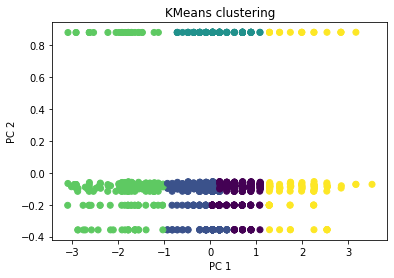

In [57]:
plt.scatter(Xp[:,0], Xp[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

In [73]:
from sklearn.neighbors import KNeighborsRegressor

# Define X and y
X = audio_df[['A Maj', 'A# Maj', 'B Maj', 'C Maj', 'C# Maj', 'D Maj', 'D# Maj',
        'E Maj', 'F Maj', 'F# Maj', 'G Maj', 'G# Maj', 'a min', 'a# min',
        'b min', 'c min', 'c# min', 'd min', 'd# min', 'e min', 'f min',
        'f# min', 'g min', 'g# min', 'bpm_scaled']]
y = audio_df['bpm_scaled']

knn_model = KNeighborsRegressor().fit(X,y) # Instanciate and train model

In [74]:
link = "https://www.youtube.com/watch?v=BY-aICbBt2Y"

In [86]:
def download_song(yt_link):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192'
        }],
    }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([yt_link])
        meta = ydl.extract_info(yt_link, download=False)
        title = meta["title"]
        song_id = meta["id"]
        output_filename = f'{title}-{song_id}.wav'
    
    return title, song_id, output_filename

In [87]:
def get_BPM(output_filename):
    y, sr = librosa.load(output_filename, sr=44100)

    # Run the default beat tracker
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

    # Convert the frame indices of beat events into timestamps
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    return tempo

In [88]:
def computeKey(afAudioData, f_s, afWindow=None, iBlockLength=4096, iHopLength=2048):

    # compute window function for FFT
    if afWindow is None:
        afWindow = ToolComputeHann(iBlockLength)

    assert(afWindow.shape[0] == iBlockLength), "parameter error: invalid window dimension"

    # key names
    cKeyNames = np.array(['C Maj', 'C# Maj', 'D Maj', 'D# Maj', 'E Maj', 'F Maj', 'F# Maj', 'G Maj', 'G# Maj', 'A Maj', 'A# Maj', 'B Maj',
                         'c min', 'c# min', 'd min', 'd# min', 'e min', 'f min', 'f# min', 'g min', 'g# min', 'a min', 'a# min', 'b min'])

    # template pitch chroma (Krumhansl major/minor), normalized to a sum of 1
    t_pc = np.array([[6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52, 5.19, 2.39, 3.66, 2.29, 2.88],
                    [6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54, 4.75, 3.98, 2.69, 3.34, 3.17]])
    t_pc = t_pc / t_pc.sum(axis=1, keepdims=True)

    # pre-processing
    afAudioData = ToolPreprocAudio(afAudioData, iBlockLength)

    # in the real world, we would do this block by block...
    [f, t, X] = spectrogram(afAudioData,
                            f_s,
                            afWindow,
                            iBlockLength,
                            iBlockLength - iHopLength,
                            iBlockLength,
                            False,
                            True,
                            'spectrum')

    #  scale the same as for matlab
    X = np.sqrt(X / 2)

    # compute instantaneous pitch chroma
    v_pc = FeatureSpectralPitchChroma(X, f_s)

    # average pitch chroma
    v_pc = v_pc.mean(axis=1)
    # compute manhattan distances for modes (major and minor)
    d = np.zeros(t_pc.shape)
    v_pc = np.concatenate((v_pc, v_pc), axis=0).reshape(2, 12)
    for i in range(0, 12):
        d[:, i] = np.sum(np.abs(v_pc - np.roll(t_pc, i, axis=1)), axis=1)

    # get unwrapped key index
    iKeyIdx = d.argmin()

    cKey = cKeyNames[iKeyIdx]

    return (cKey)

def computeKeyCl(cPath):
    
    [f_s, afAudioData] = ToolReadAudio(cPath)
    # afAudioData = np.sin(2*np.pi * np.arange(f_s*1)*440./f_s)

    cKey = computeKey(afAudioData, f_s)
    print("detected key: ", cKey)
    
    return cKey

In [103]:
title, song_id, output_filename = download_song(link)
output_filename = output_filename.replace("/", "_")

[youtube] BY-aICbBt2Y: Downloading webpage
[download] Destination: Au_Ra & CamelPhat - Panic Room-BY-aICbBt2Y.webm
[download] 100% of 3.51MiB in 00:0010MiB/s ETA 00:003
[ffmpeg] Destination: Au_Ra & CamelPhat - Panic Room-BY-aICbBt2Y.wav
Deleting original file Au_Ra & CamelPhat - Panic Room-BY-aICbBt2Y.webm (pass -k to keep)
[youtube] BY-aICbBt2Y: Downloading webpage


In [104]:
bpm = get_BPM(output_filename)

Estimated tempo: 123.05 beats per minute


In [105]:
key = computeKeyCl(output_filename)

detected key:  c min


In [115]:
new_song = pd.DataFrame()
new_song.loc[0,"name"] = title
new_song.loc[0,"BPM"] = bpm
new_song.loc[0,"key"] = key

In [116]:
new_song[""]

,name,BPM,key
0,Au/Ra & CamelPhat - Panic Room,123.046875,c min


In [117]:
key_encoded = encoder.transform(new_song[["key"]])

In [118]:
for index, key in enumerate(encoder.categories_[0]):
    new_song[key] = key_encoded.T[index]

In [119]:
new_song["bpm_scaled"] = scaler.transform(new_song[["BPM"]])

In [121]:
new_song.head()

,name,BPM,key,A Maj,A# Maj,B Maj,C Maj,C# Maj,D Maj,D# Maj,...,c min,c# min,d min,d# min,e min,f min,f# min,g min,g# min,bpm_scaled
0,Au/Ra & CamelPhat - Panic Room,123.046875,c min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.09177


In [140]:
new_X = new_song[['A Maj', 'A# Maj', 'B Maj', 'C Maj', 'C# Maj', 'D Maj', 'D# Maj',
        'E Maj', 'F Maj', 'F# Maj', 'G Maj', 'G# Maj', 'a min', 'a# min',
        'b min', 'c min', 'c# min', 'd min', 'd# min', 'e min', 'f min',
        'f# min', 'g min', 'g# min', 'bpm_scaled']]
neighbors = knn_model.kneighbors(new_X, n_neighbors=2)[1][0]
neighbors

array([158, 168])

In [143]:
audio_df.iloc[neighbors[0]][["title", "BPM", "key"]]

title    1681314 Alex Moran, LHK - By Way Of B (Origina...
BPM                                                123.047
key                                                  c min
Name: 158, dtype: object

In [145]:
audio_df.iloc[neighbors[1]][["title", "BPM", "key"]]

title    1740984 Akvo - Changeling (Original Mix)
BPM                                       123.047
key                                         c min
Name: 168, dtype: object

In [200]:
import math
y, sr = librosa.load("Au_Ra & CamelPhat - Panic Room-BY-aICbBt2Y.wav")

In [246]:
def min_max_freq(y, sr):
    librosa.feature.spectral_rolloff(y=y, sr=sr)
    # Approximate maximum frequencies with roll_percent=0.99
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
    max_freq = rolloff.max()
    # Approximate minimum frequencies with roll_percent=0.01
    rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
    sorted_rolloff = sorted(rolloff_min[0])
    for val in sorted_rolloff:
        if val > 0:
            min_freq = val
            break
    return max_freq, min_freq

In [247]:
y, sr = librosa.load("Au_Ra & CamelPhat - Panic Room-BY-aICbBt2Y.wav")
max_freq, min_freq = min_max_freq(y, sr)
print(max_freq, min_freq)

10518.9697265625 10.7666015625


In [248]:
y, sr = librosa.load("../raw_data/64 Ways (Dam Swindle's 65th Way Dub) feat. Mayer Hawthorne-SKUk9RUacDQ.wav")
max_freq, min_freq = min_max_freq(y, sr)
print(max_freq, min_freq)

10443.603515625 10.7666015625


In [242]:
y, sr = librosa.load("../raw_data/056247.wav")
max_freq, min_freq = min_max_freq(y, sr)
print(max_freq, min_freq)

10400.537109375 10.7666015625


In [243]:
y, sr = librosa.load("../raw_data/audio/100066 Lindstrom - Monsteer (Original Mix).mp3")
max_freq, min_freq = min_max_freq(y, sr)
print(max_freq, min_freq)

/Users/judithvanleersum/.pyenv/versions/3.8.6/envs/ai_dj/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


10508.203125 10.7666015625


In [244]:
y, sr = librosa.load("../raw_data/audio/1034722 Scorpio - Ali Ba-Ba (Original Mix).mp3")
max_freq, min_freq = min_max_freq(y, sr)
print(max_freq, min_freq)

/Users/judithvanleersum/.pyenv/versions/3.8.6/envs/ai_dj/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


10454.3701171875 10.7666015625


In [245]:
y, sr = librosa.load("../raw_data/audio/1060028 Miltos T - Apollo (Medway Remix).mp3")
max_freq, min_freq = min_max_freq(y, sr)
print(max_freq, min_freq)

/Users/judithvanleersum/.pyenv/versions/3.8.6/envs/ai_dj/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


10465.13671875 10.7666015625
